In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn import cluster
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv("sample_stocks.csv")
df

,returns,dividendyield
0,-19,0.0
1,-13,0.0
2,-14,0.0
3,-9,0.0
4,-19,0.0
...,...,...
643,4,4.0
644,13,4.0
645,1,4.0
646,22,4.0


In [7]:
df.describe()

,returns,dividendyield
count,648.000000,648.000000
mean,10.354938,2.434568
std,19.552899,1.645191
min,-20.000000,0.000000
25%,-10.000000,0.700000
50%,10.500000,2.500000
75%,31.000000,4.100000
max,40.000000,4.900000


In [8]:
df.head()

,returns,dividendyield
0,-19,0.0
1,-13,0.0
2,-14,0.0
3,-9,0.0
4,-19,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   returns        648 non-null    int64  
 1   dividendyield  648 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.2 KB


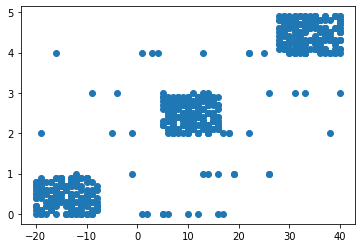

In [10]:
# x = df['returns']
# idx = np.argsort(x)
# dividen = df['dividendyield']

# plt.figure(figsize = (20, 7))

# Plotar a dispersão de Returns vs dividendyield

plt.scatter(df["returns"], df["dividendyield"])
plt.show()

In [11]:
# Normalizar os dados

from sklearn.preprocessing import StandardScaler

normalize = StandardScaler()

x = pd.DataFrame(normalize.fit_transform(df))

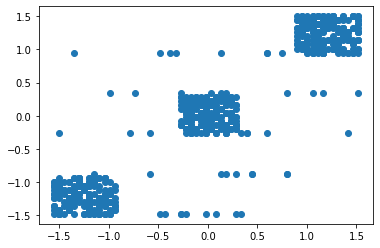

In [12]:
# Plotar a dispersão novamente

plt.scatter(x[0], x[1])
plt.show()

In [13]:
# Crie e treine o Kmeans

from sklearn import cluster

kmeans = cluster.KMeans(n_clusters = 2)
kmeans = kmeans.fit(x)

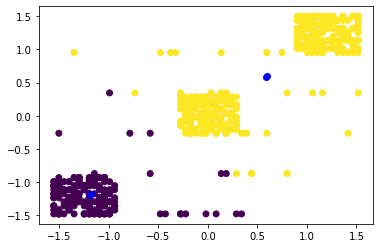

In [14]:
# Plote a dispersão juntamente com o KMeans.cluster_centers_
# Na primeira linha foi usado "c", pois é: color, sequence, or sequence of colors

plt.scatter(x[0], x[1], c = kmeans.labels_,  cmap = "viridis_r")
plt.scatter(kmeans.cluster_centers_, kmeans.cluster_centers_, color = "blue")
plt.show()

1296.0
386.98068568789614
77.62109287678899
61.645431515125466
54.05304317182545
47.94481730115659
41.82918560622205
37.32535802966952
33.67665162322588
29.536386870133075
27.226257686902716
24.112937198786298
20.844490825782454
19.155912821002545


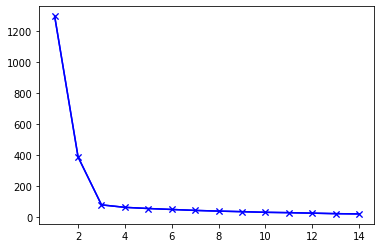

In [15]:
# Analisar K, usando o método Elbow

inertia = []

for i in range(1,15):
    kmeans = KMeans(n_clusters = i)
    kmeans = kmeans.fit(x)
    inertia.append(kmeans.inertia_)
    print(kmeans.inertia_)

plt.plot(range(1, 15), inertia, "bx-")
plt.plot(range(1, 15), inertia, "bx-")
plt.show()

# Clustering hierárquico

In [21]:
# imports necessários

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [22]:
# Implemente Clustering Hierárquico

modelo = AgglomerativeClustering(distance_threshold = 0, n_clusters = None, linkage = "single")
modelo.fit_predict(x)
# clusters.children_

array([647, 623, 620, 613, 597, 615, 355, 618, 621, 344, 439, 421, 619,
       512, 646, 614, 609, 617, 622, 616, 497, 575, 612, 645, 322, 644,
       624, 631, 611, 641, 490, 489, 449, 244, 353, 640, 363, 339, 632,
       628, 643, 428, 630, 321, 482, 351, 433, 627, 354, 625, 629, 341,
       434, 626, 305, 642, 636, 315, 326, 638, 639, 635, 319, 634, 589,
       493, 637, 538, 369, 418, 320, 343, 633, 318, 427, 610, 601, 605,
       312, 383, 304, 608, 479, 333, 540, 311, 596, 348, 600, 607, 606,
       307, 593, 595, 599, 159, 594, 296, 592, 604, 598, 542, 298, 546,
       602, 541, 300, 316, 603, 317, 358, 158, 310, 478, 591, 324, 485,
       576, 577, 314, 578, 582, 309, 431, 528, 403, 581, 382, 483, 574,
       287, 580, 313, 579, 160, 584, 573, 308, 570, 590, 336, 588, 329,
       492, 376, 587, 323, 586, 325, 569, 422, 568, 294, 352, 572, 571,
       585, 583, 567, 566, 565, 481, 563, 561, 554, 153, 552, 562, 303,
       553, 171, 151, 374, 337, 560, 161, 551, 564, 362, 545, 55

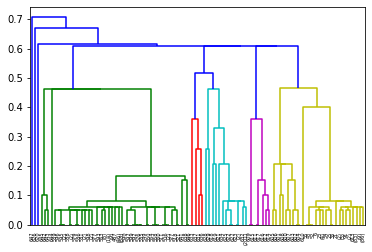

In [23]:
# Plotando o dendograma

def plot_dendrogram(modelo, **kwargs):
    
    counts = np.zeros(modelo.children_.shape[0])
    n_samples = len(modelo.labels_)
    
    for i, merge in enumerate(modelo.children_):
        current_count = 0
        for child_index in merge:
            if child_index < n_samples:
                current_count += 1
            else:
                current_count += counts[child_index - n_samples]
            counts[i] = current_count
    linkage_matrix = np.column_stack([modelo.children_, modelo.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(modelo, truncate_mode = 'level', p = 12)
plt.show()

In [24]:
# DBSCAN
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.dbscan.html?highlight=dbscan#sklearn.cluster.dbscan

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = .5, min_samples = 15).fit(x)

# Não consegui desenvolver essa forma de clustering